In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd
import numpy as np
import os

# original dataset

In [11]:
data_dir= '~/data/twconv/twconv_2011_trec'
data_dir=os.path.expanduser(data_dir)

In [13]:
cols = ['conv_id' , 'id', 'reply_to_id', 'raw_text','text','user_id']
path = os.path.join(data_dir, 'twconv_2011_trec.data')
ds = pd.read_csv(path, sep='\t', header=None, names=cols, dtype=object)
ds.shape

(40490, 6)

lets check the number of tweets

In [14]:
ds.id.nunique(), ds.conv_id.nunique(), ds.user_id.nunique()

(38999, 7811, 10123)

# preprocessing

In [7]:
path = os.path.join(data_dir, 'conversations.csv')
ds = pd.read_csv(path, dtype=object)
ds.shape

(22062, 8)

number of conversations after filtering missing tweets, some tweets have been deleted or not available due the user goes protected

In [8]:
ds.conversation_id.nunique()

2012

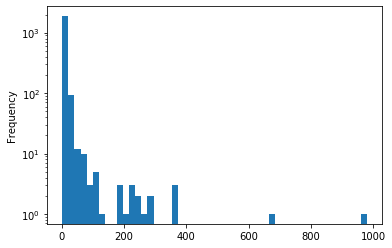

In [9]:
ds.groupby('conversation_id').size().plot.hist(bins=50)
plt.yscale('log')

also it's important to know the period in which the tweets were posted to know if there is a bias to certain users/events

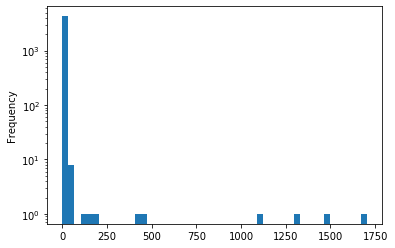

In [10]:
ds.groupby('user_id').size().plot.hist(bins=50)
plt.yscale('log')

# stagging

the evaluation must be focus on users with more than one tweets, so we have at least one tweet that indicates its  preferences

next, we need to define the hyperparams for the length of the context and the profiles, this is based on the number of words.  we should base on the tokenized splits

In [4]:
data_dir= '~/data/twconv/trec/staggingdata'

In [5]:
path = os.path.join(data_dir, 'train.csv')
ds = pd.read_csv(path, dtype=object)
ds.shape

(14574, 3)

In [6]:
ds['context_nw'] = ds.context.apply(lambda x: len(x.split()))

Text(0, 0.5, 'log')

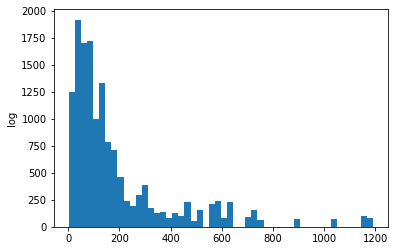

In [7]:
ds.context_nw.plot.hist(bins=50)
plt.ylabel('log')

since there are some very long context (outliers) we need to take a percentil

In [8]:
np.percentile(ds.context_nw, 70)

187.0

it seems for context the length could be 75% ~ 194

lets check for profiles

In [9]:
ds['profile_nw'] = ds.profile.apply(lambda x: len(x.split()))

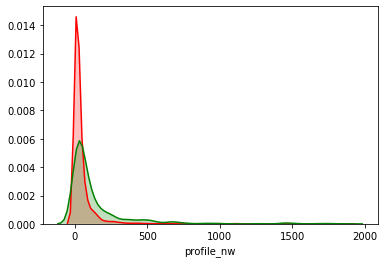

In [10]:
# Plot a kernel density estimate and rug plot
sns.despine(left=True)
sns.distplot(ds[ds.flag=='0'].profile_nw, hist=False, kde_kws={"shade": True} , color="r")
sns.distplot(ds[ds.flag=='1'].profile_nw, hist=False, kde_kws={"shade": True} , color="g")
#plt.yscale('log')

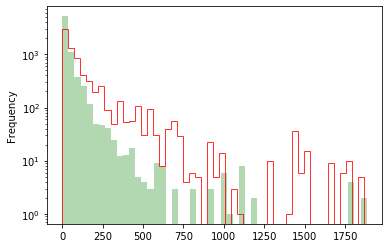

In [11]:
#ds.profile_nw.plot.hist(bins=50, alpha=0.3, color='b')
ds[ds.flag=='0'].profile_nw.plot.hist(bins=50, alpha=0.3, color='g', )
ds[ds.flag=='1'].profile_nw.plot.hist(bins=50, alpha=0.8, color='r', histtype='step')
plt.yscale('log')

# the same: since there are some very long profiles (outliers) we need to take a percentil

In [12]:
np.percentile(ds.profile_nw, 70)

67.0

In [13]:
(np.percentile(ds.context_nw, 70) + np.percentile(ds.profile_nw, 70)) / 2

127.0

lets look at the distribution of distractors

In [14]:
path = os.path.join(data_dir, 'valid.csv')
ds = pd.read_csv(path, dtype=object)
ds.shape

(1334, 11)

In [15]:
ds.fillna('', inplace=True)

In [16]:
ds[f'profile_nw'] = ds['profile'].apply(lambda x: len(x.split()))

In [17]:
for i in range(9):
    ds[f'distractor_nw{i}'] = ds[f'distractor{i}'].apply(lambda x: len(x.split()))
    print(f'distractor{i}')

distractor0
distractor1
distractor2
distractor3
distractor4
distractor5
distractor6
distractor7
distractor8


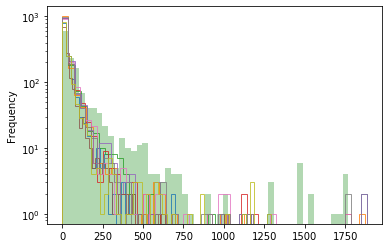

In [18]:
ds.profile_nw.plot.hist(bins=50, alpha=0.3, color='g' )
for i in range(9):
    ds[f'distractor_nw{i}'].plot.hist(bins=50, alpha=0.8, histtype='step')
plt.yscale('log')

# dataset complete

In [1]:
!head ~/data/microblog_conversation/tweets_TREC.data


0	5621079719	null	i stink at math! ughhh.	i stink at math ! ughhh .	27260086
0	34089140559544320	5621079719	@justinbieber don't worry we all do :) follow me	MENTION don't worry we all do EMOTICON :) follow me	25768156
1	5911874749	null	Omg Vampire Diaries this week!?!? Who saw it???? SO hott!!!!!!!!!! I'm watching the makeout scene over and over!!!!	omg vampire diaries this week !?!? who saw it ???? so hott !!!!!!!!!! i'm watching the makeout scene over and over !!!!	50515656
1	31744611152039936	5911874749	@msleamichele haha I luv tht show....addicting	MENTION haha i luv tht show .... addicting	239214198
2	6496465397	null	Hi guys we are finally on Twitter how are you all? We just want to thank everyone for all the amazing support we have received during XF	hi guys we are finally on twitter how are you all ? we just want to thank everyone for all the amazing support we have received during xf	95461802
2	31777629853974528	6496465397	@planetjedward LOVE YOU GUYS DM ME GO ON U NO U WANT TO

In [28]:
cols = ['conversation_id' , 'id', 'in_reply_to_status_id', 'rawtext', 'text', 'user_id']
path = os.path.join(data_dir, 'tweets_TREC.data')
ds = pd.read_csv(path, sep='\t', header=None, names=cols, dtype=object)
ds.shape

(38999, 6)

In [29]:
ds.head()


,conversation_id,id,in_reply_to_status_id,rawtext,text,user_id
0,0,5621079719,NaN,i stink at math! ughhh.,i stink at math ! ughhh .,27260086
1,0,34089140559544320,5621079719,@justinbieber don't worry we all do :) follow me,MENTION don't worry we all do EMOTICON :) foll...,25768156
2,1,5911874749,NaN,Omg Vampire Diaries this week!?!? Who saw it??...,omg vampire diaries this week !?!? who saw it ...,50515656
3,1,31744611152039936,5911874749,@msleamichele haha I luv tht show....addicting,MENTION haha i luv tht show .... addicting,239214198
4,2,6496465397,NaN,Hi guys we are finally on Twitter how are you ...,hi guys we are finally on twitter how are you ...,95461802


In [30]:
ds.conversation_id.nunique()

7500

In [54]:
data_dir= '~/data/microblog_conversation/trec'
path = os.path.join(data_dir, 'conversations.csv')
ds = pd.read_csv(path,dtype=object)
ds.shape

(38999, 8)

In [55]:
ds.conversation_id.nunique()


7500

In [57]:
path = os.path.join(data_dir, 'dialogs.csv')
ds = pd.read_csv(path, dtype=object)
ds.shape

(40490, 10)

In [59]:
ds.head()

,id,in_reply_to_status_id,text,user_id,conversation_id,conversation_deep,num_replies,num_users,dialog_id,turns
0,10093975476,NaN,first line correction : moon shine on the bayo...,46576295,10093975476,1,2,2,31753376664522752,2
1,31753376664522752,10093975476,MENTION was ur bday as special as it seemed to...,51765231,10093975476,2,2,2,31753376664522752,2
2,10180145361,NaN,i used to get nightmares watching scooby doo ....,27260086,10180145361,1,2,2,30115565162995712,2
3,30115565162995712,10180145361,MENTION thiss was tweeted on maah b-day EMOTIC...,211996193,10180145361,2,2,2,30115565162995712,2
4,10329367913701377,NaN,stuck on a plane at manc airport ... going no ...,90896009,10329367913701377,1,2,2,31521342494871552,2


In [40]:
path = os.path.join(data_dir, 'trec', 'test.csv')
ds = pd.read_csv(path, dtype=object)
ds.shape

(1994, 11)

# training text length distribution

In [6]:
data_dir= '~/data/twconv/twconv_2011_trec'
data_dir= os.path.expanduser(data_dir)
path = os.path.join(data_dir, 'alldata', 'train.csv')
ds = pd.read_csv(path)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122960 entries, 0 to 122959
Data columns (total 3 columns):
source    122960 non-null object
target    122960 non-null object
flag      122960 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
ds.groupby('flag').size()

flag
0    110664
1     12296
dtype: int64

In [11]:
ds['source_num_words'] = ds.source.apply(lambda x: len(x.split(' ')))
ds['target_num_words'] = ds.target.apply(lambda x: len(x.split(' ')))

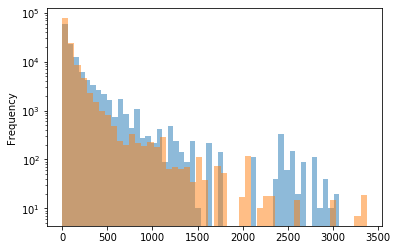

In [19]:
#plt.figure(figsize=(10,4))
#plt.subplot(121)
ds.source_num_words.plot.hist(bins=50, alpha=0.5)
plt.yscale('log')
#plt.subplot(122)
ds.target_num_words.plot.hist(bins=50, alpha=0.5)
plt.yscale('log')

In [20]:
data_dir= '~/data/twconv/twconv_2011_trec'
data_dir= os.path.expanduser(data_dir)
path = os.path.join(data_dir, 'alldata', 'train.csvrecords')
ds = pd.read_csv(path)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122960 entries, 0 to 122959
Data columns (total 3 columns):
source    122960 non-null object
target    122960 non-null object
flag      122960 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [21]:
ds.groupby('flag').size()

flag
0    110664
1     12296
dtype: int64

In [22]:
ds['source_num_words'] = ds.source.apply(lambda x: len(x.split(' ')))
ds['target_num_words'] = ds.target.apply(lambda x: len(x.split(' ')))

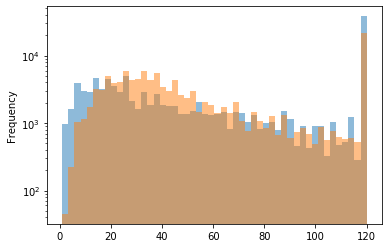

In [23]:
#plt.figure(figsize=(10,4))
#plt.subplot(121)
ds.source_num_words.plot.hist(bins=50, alpha=0.5)
plt.yscale('log')
#plt.subplot(122)
ds.target_num_words.plot.hist(bins=50, alpha=0.5)
plt.yscale('log')

In [24]:
data_dir= '~/data/twconv/twconv_2011_trec'
data_dir= os.path.expanduser(data_dir)
path = os.path.join(data_dir, 'alldata', 'train_ids.csv')
ds = pd.read_csv(path)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122960 entries, 0 to 122959
Data columns (total 3 columns):
source    122960 non-null int64
target    122960 non-null int64
flag      122960 non-null int64
dtypes: int64(3)
memory usage: 2.8 MB
